Problem No 2

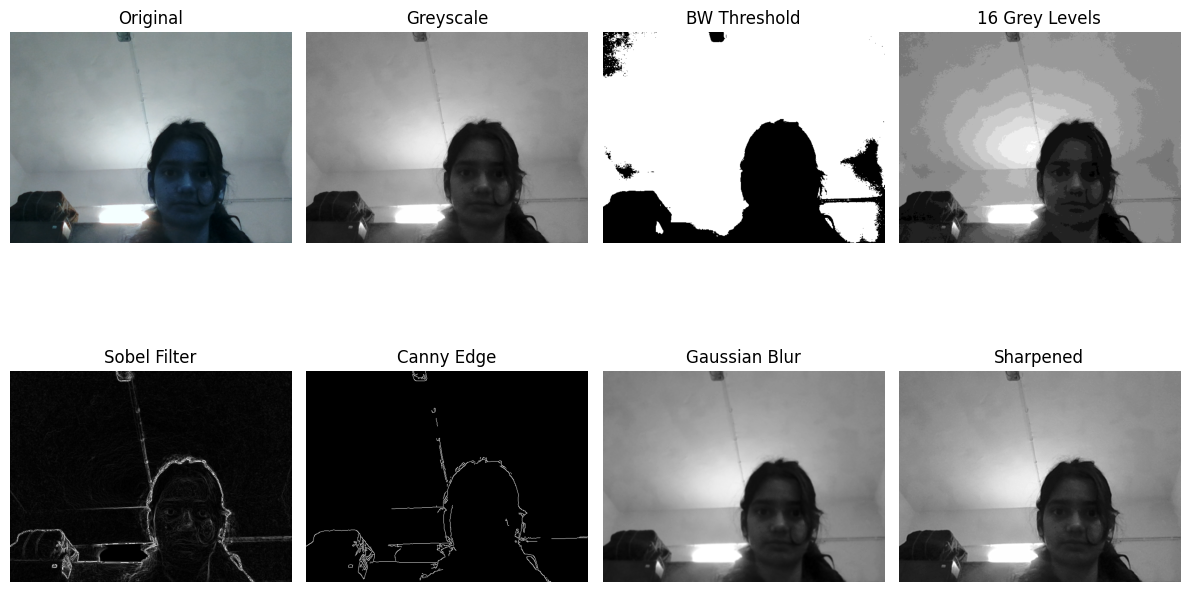

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images in a grid with titles
def show(name, n, m, i, Title):
    plt.subplot(n, m, i)  # Define subplot grid (n x m) at position i
    plt.imshow(name, cmap='gray')  # Display image in grayscale
    plt.title(Title)  # Add a title
    plt.axis('off')  # Turn off axes

# 1. Capture Image Using Webcam
def capture_image():
    cap = cv2.VideoCapture(0)  # Change to 1 if needed
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image!")
        cap.release()
        return None
    cap.release()
    return frame

# 2a. Greyscale Image
def greyscale_image(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2b.i. Threshold Image: Black & White
def threshold_bw(image, threshold_value=127):
    _, binary = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary

# 2b.ii. Threshold Image: 16 Grey Colors
def threshold_greys(image, levels=16):
    step = 256 // levels
    grey_16 = (image // step) * step
    return grey_16

# 2c. Sobel Filter & Canny Edge Detection
def edge_detection(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    sobel_combined = np.uint8(np.abs(sobel_combined))  # Convert to uint8

    canny_edges = cv2.Canny(image, 50, 150)  # Canny Edge Detection
    return sobel_combined, canny_edges

# 2d. Gaussian Filter for Noise Removal
def gaussian_blur(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

# 2e. Sharpen Image
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# 2f. Convert RGB to BGR
def convert_rgb_to_bgr(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# 3. Display Images in a 2x4 Grid
def display_images(original, grey, bw, grey_16, sobel, canny, blurred, sharpened):
    images = [original, grey, bw, grey_16, sobel, canny, blurred, sharpened]
    titles = ["Original", "Greyscale", "BW Threshold", "16 Grey Levels",
              "Sobel Filter", "Canny Edge", "Gaussian Blur", "Sharpened"]

    combined = np.zeros((480 * 2, 640 * 4, 3), dtype=np.uint8)
    idx = 0
    for i in range(2):
        for j in range(4):
            img = images[idx]
            if len(img.shape) == 2:  # Grayscale images
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
            img = cv2.resize(img, (640, 480))
            combined[480 * i:480 * (i + 1), 640 * j:640 * (j + 1)] = img
            idx += 1

    cv2.imshow("2x4 Image Grid", combined)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Main Function
def main():
    # Step 1: Capture Image
    image = capture_image()
    if image is None:
        return

    # Step 2: Perform Image Processing
    grey = greyscale_image(image)
    bw = threshold_bw(grey)
    grey_16 = threshold_greys(grey)
    sobel, canny = edge_detection(grey)
    blurred = gaussian_blur(grey)
    sharpened = sharpen_image(blurred)

    # Step 3: Display Images in Grid Using `show` Function
    plt.figure(figsize=(12, 8))  # Set figure size
    show(image, 2, 4, 1, "Original")
    show(grey, 2, 4, 2, "Greyscale")
    show(bw, 2, 4, 3, "BW Threshold")
    show(grey_16, 2, 4, 4, "16 Grey Levels")
    show(sobel, 2, 4, 5, "Sobel Filter")
    show(canny, 2, 4, 6, "Canny Edge")
    show(blurred, 2, 4, 7, "Gaussian Blur")
    show(sharpened, 2, 4, 8, "Sharpened")

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    # Step 6: Display All Images
    display_images(image, grey, bw, grey_16, sobel, canny, blurred, sharpened)

if __name__ == "__main__":
    main()


Problem No 3

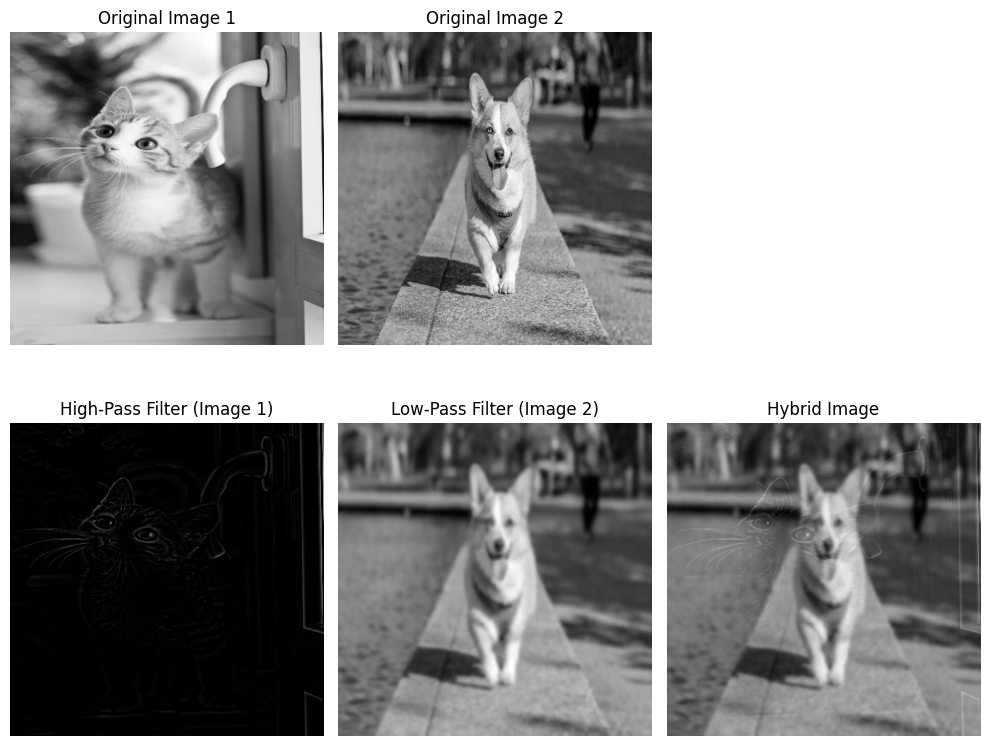

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def high_pass_filter(image, kernel_size=15):
    # Apply Gaussian blur (low-pass filter)
    low_pass = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    # Subtract low-pass filtered image from the original
    high_pass = cv2.subtract(image, low_pass)
    return high_pass

def low_pass_filter(image, kernel_size=15):
    # Apply Gaussian blur (low-pass filter)
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def create_hybrid_image(image1, image2, kernel_size=15):
    # Apply filters
    low_pass_img2 = low_pass_filter(image2, kernel_size)
    high_pass_img1 = high_pass_filter(image1, kernel_size)

    # Combine images
    hybrid = cv2.addWeighted(high_pass_img1, 0.5, low_pass_img2, 0.5, 0)
    return high_pass_img1, low_pass_img2, hybrid

# Load images
image1 = cv2.imread(r'C:\Users\Vibha Narayan\Downloads\pexels-wojciech-kumpicki-1084687-2071873.jpg', cv2.IMREAD_GRAYSCALE)  # High-pass image
image2 = cv2.imread(r'C:\Users\Vibha Narayan\Downloads\pexels-hnoody93-58997.jpg', cv2.IMREAD_GRAYSCALE)  # Low-pass image

# Check if images are loaded properly
if image1 is None or image2 is None:
    print("Error: One or both images could not be loaded. Check the file paths.")
else:
    # Resize images to match dimensions
    image1 = cv2.resize(image1, (512, 512))
    image2 = cv2.resize(image2, (512, 512))

    # Generate hybrid image
    high_pass, low_pass, hybrid = create_hybrid_image(image1, image2, kernel_size=15)

    # Display results
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 3, 1)
    plt.title("Original Image 1")
    plt.imshow(image1, cmap='gray')
    plt.axis("off")

    plt.subplot(2, 3, 2)
    plt.title("Original Image 2")
    plt.imshow(image2, cmap='gray')
    plt.axis("off")

    plt.subplot(2, 3, 4)
    plt.title("High-Pass Filter (Image 1)")
    plt.imshow(high_pass, cmap='gray')
    plt.axis("off")

    plt.subplot(2, 3, 5)
    plt.title("Low-Pass Filter (Image 2)")
    plt.imshow(low_pass, cmap='gray')
    plt.axis("off")

    plt.subplot(2, 3, 6)
    plt.title("Hybrid Image")
    plt.imshow(hybrid, cmap='gray')
    plt.axis("off")

    plt.tight_layout()
    plt.show()


Problem No 5


In [4]:
from PIL import Image
import numpy as np

def identify_flag(image_path):
    """
    Determines if the input image is the flag of Indonesia or Poland
    based on color distribution.
    """
    # Open image and convert to RGB
    img = Image.open(image_path).convert("RGB")
    width, height = img.size

    # Crop the image into top and bottom halves
    top_half = img.crop((0, 0, width, height // 2))
    bottom_half = img.crop((0, height // 2, width, height))

    # Convert top and bottom halves to numpy arrays
    top_colors = np.array(top_half)
    bottom_colors = np.array(bottom_half)

    # Calculate average color for top and bottom halves
    top_avg_color = np.mean(top_colors, axis=(0, 1))
    bottom_avg_color = np.mean(bottom_colors, axis=(0, 1))

    # Define basic color thresholds for red and white
    red_threshold = [150, 0, 0]  # High red, low green and blue
    white_threshold = [200, 200, 200]  # High R, G, B values (white)

    # Determine whether top/bottom is closer to red or white
    def is_red(color):
        return color[0] > red_threshold[0] and color[1] < 100 and color[2] < 100

    def is_white(color):
        return all(color[i] > white_threshold[i] for i in range(3))

    # Identify flag based on color positions
    if is_red(top_avg_color) and is_white(bottom_avg_color):
        return "Flag of Indonesia"
    elif is_white(top_avg_color) and is_red(bottom_avg_color):
        return "Flag of Poland"
    else:
        return "Unknown Flag"
    

# Example usage
if __name__ == "__main__":
    image_path = r"C:\Users\Vibha Narayan\OneDrive\Pictures\Screenshots\Screenshot 2024-12-18 215738.png"  # Replace with your image path
    result = identify_flag(image_path)
    print("Result:", result)


Result: Flag of Indonesia
